In [3]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.preprocess
import PIL
import numpy
import cv2
import skimage
import matplotlib.pyplot
%matplotlib inline

Capture time: 5 s
Capture: 50 (frame rate, images per second) for 251 frames in 5 seconds
Gain: 3000
Shutter speed: 50

CMOS camera, with 2400 x 1700 pixel resolution at 168 fps



In [1]:
picnr = 100
runnr = 7
path1 = 'gr2/run'+str(runnr)+'/PicturesPNGRaw/Picture'+str(picnr)+'.png'
path2 = 'gr2/run'+str(runnr)+'/PicturesPNGRaw/Picture'+str(picnr+1)+'.png'
dt =  5/251# time separation between pictures = Capture time/number_of_pictures
dt

0.0199203187250996

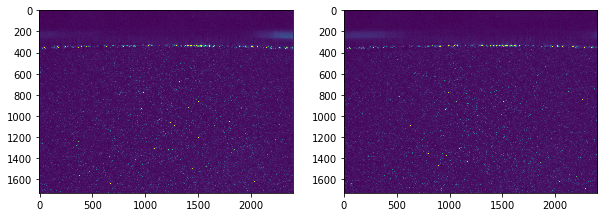

In [4]:
img1 = openpiv.tools.imread(path1)
img2 = openpiv.tools.imread(path2)
fig = matplotlib.pyplot.figure(figsize=[10,10])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<matplotlib.figure.Figure at 0x7f134dbf54e0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f134dc5bb38>,
       dtype=object))

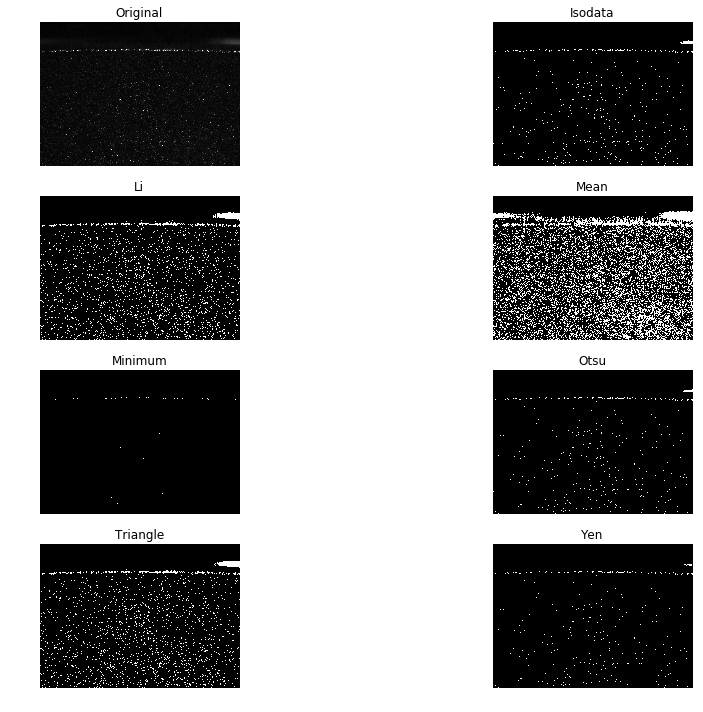

In [5]:
img_gray = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)  # As grayscale
skimage.filters.try_all_threshold(img_gray.astype(numpy.int32),figsize=(16, 10), verbose=True)

In [6]:
img1.shape

(1728, 2400)

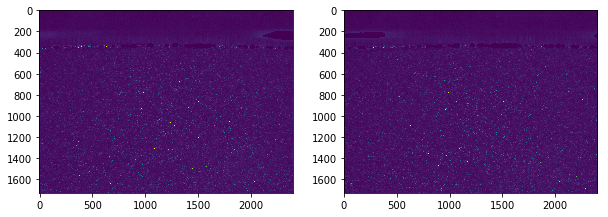

In [7]:
mask1= openpiv.preprocess.dynamic_masking(img1.astype(numpy.int32), method='intensity',filter_size=10,threshold=0.005)
mask2= openpiv.preprocess.dynamic_masking(img2.astype(numpy.int32), method='intensity',filter_size=10,threshold=0.005)
fig = matplotlib.pyplot.figure(figsize=[10,10])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2)

## Masking with opencv (cv2) - image processing package: 
### Segmentation by thresholding (region based segmentation) & filtering with Otsu's method (foreground from background)

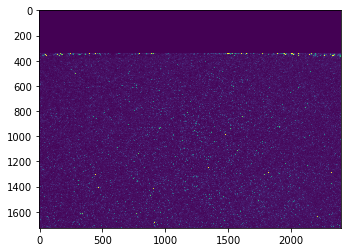

In [11]:
mask = numpy.zeros(img1.shape, dtype = "uint8")
cv2.rectangle(mask, (0,340), (img1.shape[1], img1.shape[0]), (255, 255, 255), -1) 
maskedImg1 = cv2.bitwise_and(img1, mask)
#mask_ = numpy.zeros(img1.shape, dtype = "uint8")
matplotlib.pyplot.imshow(maskedImg1)
matplotlib.pyplot.show()

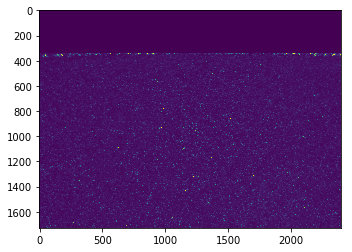

In [12]:
mask = numpy.zeros(img2.shape, dtype = "uint8")
cv2.rectangle(mask, (0,340), (img2.shape[1], img2.shape[0]), (255, 255, 255), -1) 
maskedImg2 = cv2.bitwise_and(img2, mask)
#mask_ = numpy.zeros(img1.shape, dtype = "uint8")
matplotlib.pyplot.imshow(maskedImg2)
matplotlib.pyplot.show()

In [13]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
    # mouse callback function

def draw_circle(event,x,y,flags,param):
        global ix,iy,drawing,mode
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            ix,iy = x,y
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing == True:
                if mode == True:
                    cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
                else:
                    cv2.circle(img1,(x,y),5,(0,0,0),-1)
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            if mode == True:
                cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
            else:
                cv2.circle(img1,(x,y),5,(0,0,0),-1)
    
img1 = cv2.imread(path1)
#img1 = cv2.imread('mask'+str(runnr)+'img1.jpg')

cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)
while(1):  #while True
        cv2.imshow('image',img1)
        k = cv2.waitKey(20) & 0xFF
        if k == 27: # ESC on keyboard closes the window
            cv2.destroyAllWindows()
            break
        elif k == ord('m'):
            mode = not mode
        elif k == ord('s'):  #if "s" is pressed on the keyboard,  
            cv2.imwrite('mask'+str(runnr)+'img1.jpg', img1)  #the resulting drawing is saved
            cv2.destroyAllWindows()                         #and the window is closed
            break
cv2.destroyAllWindows()

In [14]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
    # mouse callback function

def draw_circle(event,x,y,flags,param):
        global ix,iy,drawing,mode
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            ix,iy = x,y
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing == True:
                if mode == True:
                    cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
                else:
                    cv2.circle(img2,(x,y),5,(0,0,0),-1)
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            if mode == True:
                cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
            else:
                cv2.circle(img2,(x,y),5,(0,0,0),-1)
    
img1 = cv2.imread(path2)
#img1 = cv2.imread('mask'+str(runnr)+'img2.jpg')

cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)
while(1):  #while True
        cv2.imshow('image',img2)
        k = cv2.waitKey(20) & 0xFF
        if k == 27: # ESC on keyboard closes the window
            cv2.destroyAllWindows()
            break
        elif k == ord('m'):
            mode = not mode
        elif k == ord('s'):  #if "s" is pressed on the keyboard,  
            cv2.imwrite('mask'+str(runnr)+'img2.jpg', img2)  #the resulting drawing is saved
            cv2.destroyAllWindows()                         #and the window is closed
            break
cv2.destroyAllWindows()


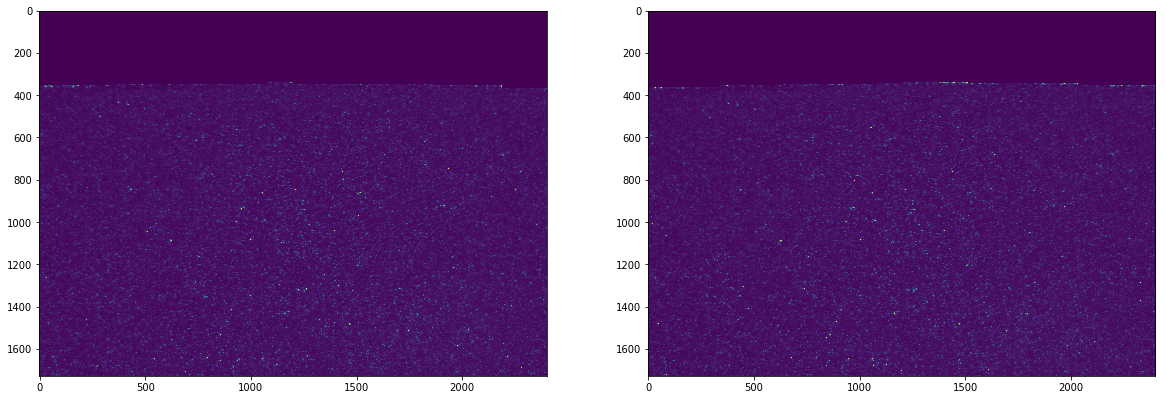

In [15]:
mask1 = cv2.imread('mask'+str(runnr)+'img1.jpg', cv2.IMREAD_GRAYSCALE) 
mask2 = cv2.imread('mask'+str(runnr)+'img2.jpg', cv2.IMREAD_GRAYSCALE) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2)

32756

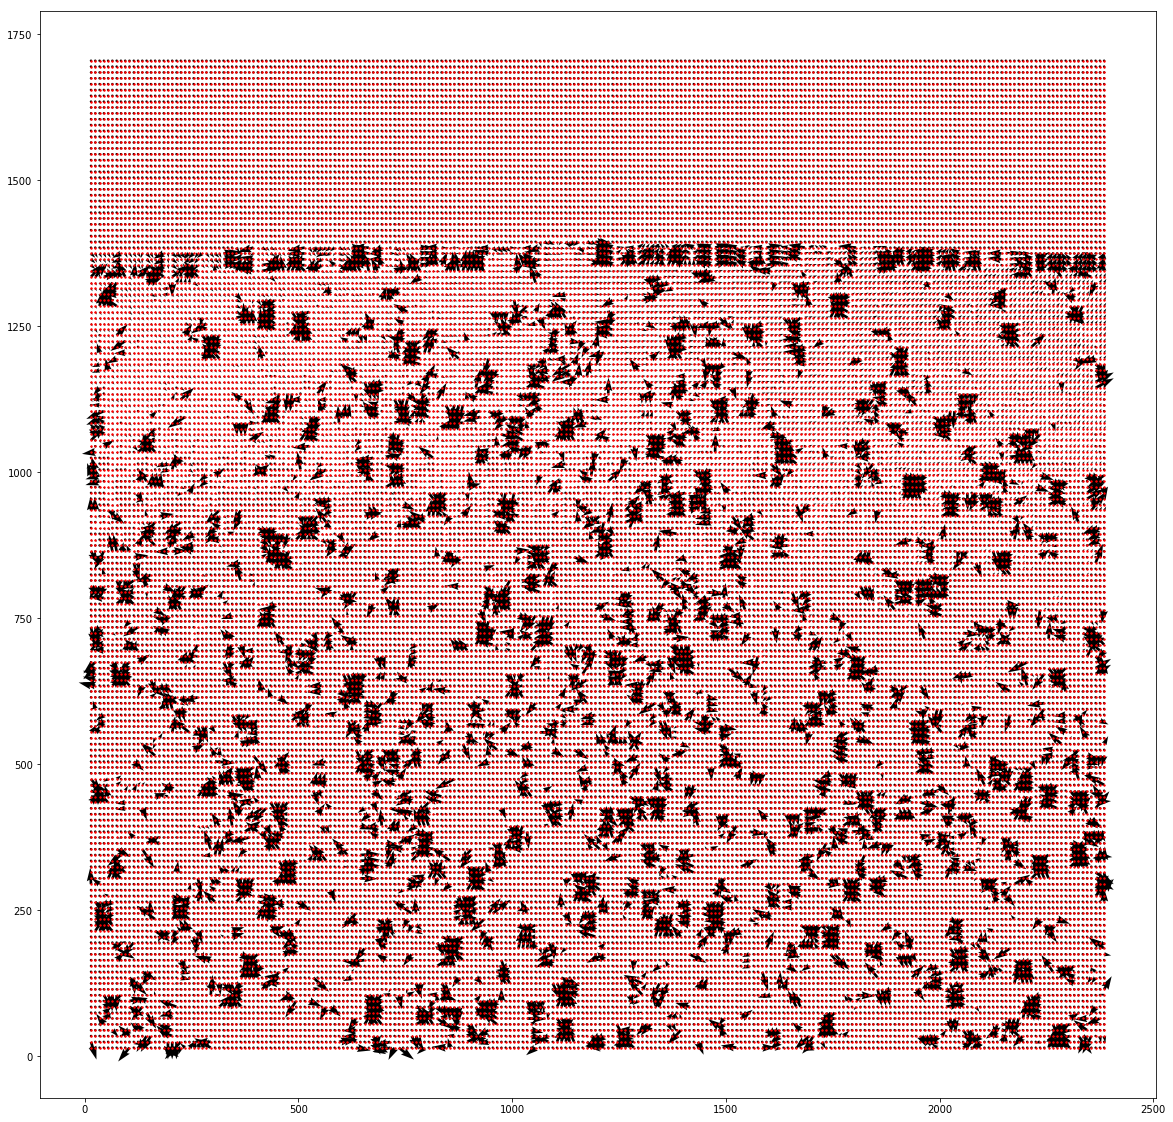

In [18]:
window_size=30 #40   the size of the interrogation window on first image, in pixels
search_areasize = 50  #80    size of the (square) interrogation window from the second frame, in pixels
overlap = 20  #20  the number of pixels by which two adjacent windows overlap.
u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask2.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=dt, #12
                                                           search_area_size=search_areasize,
                                                           subpixel_method= 'gaussian',
                                                           sig2noise_method='peak2peak' ) 
x, y = openpiv.process.get_coordinates(image_size=mask1.shape, window_size=window_size, 
                                       overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
matplotlib.pyplot.scatter(x, y, color='r', s=2)
name= 'primeira-run'+str(runnr)+'.pdf'
fig.savefig(name)   
matrivb = numpy.nonzero(numpy.sqrt(u**2 + v**2))

matrivb[1].size

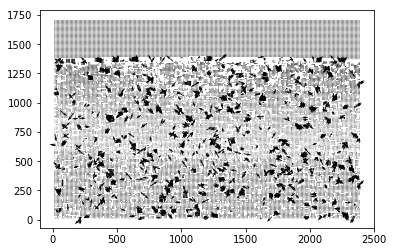

In [19]:
u1, v1, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )#1.3
#u1, v1, mask = openpiv.validation.global_val( u, v, (-55000, 15000), (-15000, 15000) )
matplotlib.pyplot.quiver( x, y, u1, v1 )

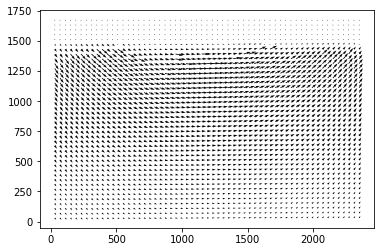

In [57]:
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=15, tol= 0.0001, kernel_size=2 )
matplotlib.pyplot.quiver( x, y, u2, v2 )

# Define matching reference points in world coordinate

In [16]:
#[wx,wy] = ndgrid((0:5:20),(-5:-5:-10));    # same as matlab ndgrid:
n_x= 3    #number of points in x axis
n_y = 5   # number of points in y axis
first_x = 0
last_x = 20
first_y = -1.5+ (-3.3333)*4#-10
last_y = -1.5#-5
import cmath 
#foo = n_x*cmath.sqrt(-1)
world1 = numpy.zeros((n_x*n_y,3), numpy.float32)  #numpy.zeros((6*7,3), numpy.float32)
#print(world)
world1[:,:2] = numpy.mgrid[first_x : last_x :n_x*cmath.sqrt(-1), first_y : last_y : n_y*cmath.sqrt(-1)].T.reshape(-1,2)
#print(world1)
#number of points = n_x*n_y

world = world1
#world= list(zip( world1[:,0], world1[:,1]))
world = world.astype('float32')
world

array([[  0.    , -14.8332,   0.    ],
       [ 10.    , -14.8332,   0.    ],
       [ 20.    , -14.8332,   0.    ],
       [  0.    , -11.4999,   0.    ],
       [ 10.    , -11.4999,   0.    ],
       [ 20.    , -11.4999,   0.    ],
       [  0.    ,  -8.1666,   0.    ],
       [ 10.    ,  -8.1666,   0.    ],
       [ 20.    ,  -8.1666,   0.    ],
       [  0.    ,  -4.8333,   0.    ],
       [ 10.    ,  -4.8333,   0.    ],
       [ 20.    ,  -4.8333,   0.    ],
       [  0.    ,  -1.5   ,   0.    ],
       [ 10.    ,  -1.5   ,   0.    ],
       [ 20.    ,  -1.5   ,   0.    ]], dtype=float32)

# Define matching reference points in pixel coordinate

In [17]:
drawing = False # true if mouse is pressed
end = False # 
ix1,iy1 = -1,-1

numbPoints = 0
ix = []
iy = []

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,end, ix1, iy1, numbPoints, n_x, n_y
    
    if end ==False:        
        if event == cv2.EVENT_LBUTTONDBLCLK: 
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
        
        elif event == cv2.EVENT_LBUTTONUP :
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            print(numbPoints, n_x*n_y)
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                #print(cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10))
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
            
img = cv2.imread('calibration33mmbetweeneachdot.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) #cv2.WINDOW_NORMAL in order to resize window, when image is large
cv2.setMouseCallback('image',draw_circle)

cv2.imshow('image',img)

while(1):  #while True
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("pixelcoordinates.jpg", img)   #the resulting drawing is saved
        cv2.destroyAllWindows()                         #and the window is closed
        break
 
print(ix, iy) #pixel
#pixelX= ix[0:-1]
#pixelY = iy[0:-1]
pixelX = ix
pixelY = iy
print(pixelX, pixelY)
pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
#objp[:,:2] = numpy.mgrid[0:7,0:6].T.reshape(-1,2)
pixel

1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 15
[122, 1052, 1996, 115, 1049, 2007, 115, 1049, 2003, 119, 1059, 2000, 119, 1056, 2007] [1664, 1678, 1661, 1352, 1349, 1359, 1051, 1044, 1048, 729, 729, 725, 410, 417, 420]
[122, 1052, 1996, 115, 1049, 2007, 115, 1049, 2003, 119, 1059, 2000, 119, 1056, 2007] [1664, 1678, 1661, 1352, 1349, 1359, 1051, 1044, 1048, 729, 729, 725, 410, 417, 420]


array([[ 122., 1664.],
       [1052., 1678.],
       [1996., 1661.],
       [ 115., 1352.],
       [1049., 1349.],
       [2007., 1359.],
       [ 115., 1051.],
       [1049., 1044.],
       [2003., 1048.],
       [ 119.,  729.],
       [1059.,  729.],
       [2000.,  725.],
       [ 119.,  410.],
       [1056.,  417.],
       [2007.,  420.]], dtype=float32)

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #'mpwoco.bmp' converted to gray
#returns the camera matrix, distortion coefficients, rotation and translation vectors etc:

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([world], [pixel], gray.shape[::-1],None,None) 
#calibrateCamera(objectPoints, imagePoints, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [19]:
#Finds a perspective transformation between two planes.
H= cv2.findHomography(cv2.convertPointsToHomogeneous(pixel),cv2.convertPointsToHomogeneous(world[:,0:2])) 
#H = cv2.findHomography(world,cv2.convertPointsToHomogeneous(pixel)) 
tform = H[0]
print(tform)

[[ 1.06567873e-02 -6.41619906e-07 -1.24323458e+00]
 [-2.43516402e-05 -1.06249039e-02  2.93813455e+00]
 [ 3.95266613e-06 -3.55635181e-06  1.00000000e+00]]


/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


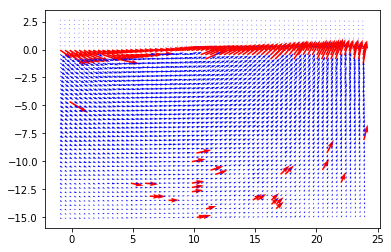

In [21]:
def pixel2world(tform, U, V, X, Y, dt):
    
    pixelX= X.reshape(X.size,1)

    pixelY= Y.reshape(Y.size,1)
    pixelY = numpy.sort(pixelY, axis=0) 
    V= numpy.fliplr(V.reshape(V.size,1))
    #V=numpy.fliplr(V)
    
    pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
    xc = numpy.matmul(tform,cv2.convertPointsToHomogeneous(pixel).transpose().reshape(3,x.size))
    worldrec= cv2.convertPointsFromHomogeneous(xc.transpose()) #converting to world coordinates
    #xn = worldrec.shape[0]
    #yn = worldrec.shape[2]
    #xw = worldrec.reshape(xn,yn)[:,0]
    #yw = worldrec.reshape(xn,yn)[:,1]
    xw = worldrec[:,:,0]
    yw = worldrec[:,:,1]
    #linear case, the jacobian is : tform[0:2,0:2]
    Jacl = tform[0:2,0:2]
    
    uv=numpy.matmul(Jacl, numpy.array([U.reshape(U.size,1),V]).astype('float32')[:,:,0])
    #Uw = uv[0].reshape(u.shape[0],u.shape[1])
    #Vw = uv[1].reshape(v.shape[0],v.shape[1])
    un = uv.shape[0]
    vn = uv.shape[1]
    Uw = uv[0,:] #numpy.flip(uv[0,:],0)  
    Vw = -uv[1,:] #numpy.flip(uv[1,:],0)   
    #Uw = (Jacl[0,0]*u + Jacl[0,1]*v  )/dt
    #Vw = (Jacl[1,0]*u + Jacl[1,1]*v  )/dt
    
    return Uw, Vw, xw, yw
uw, vw, xw, yw = pixel2world(tform, u, v, x, y, 0.012)
documentname= 'exprun'+str(runnr)+'.txt'
openpiv.tools.save(xw, yw, uw, vw, mask, documentname) #save the data to an ascii file, for later processing
openpiv.tools.display_vector_field(documentname, scaling_factor=1)#, scale=100, width=0.005)

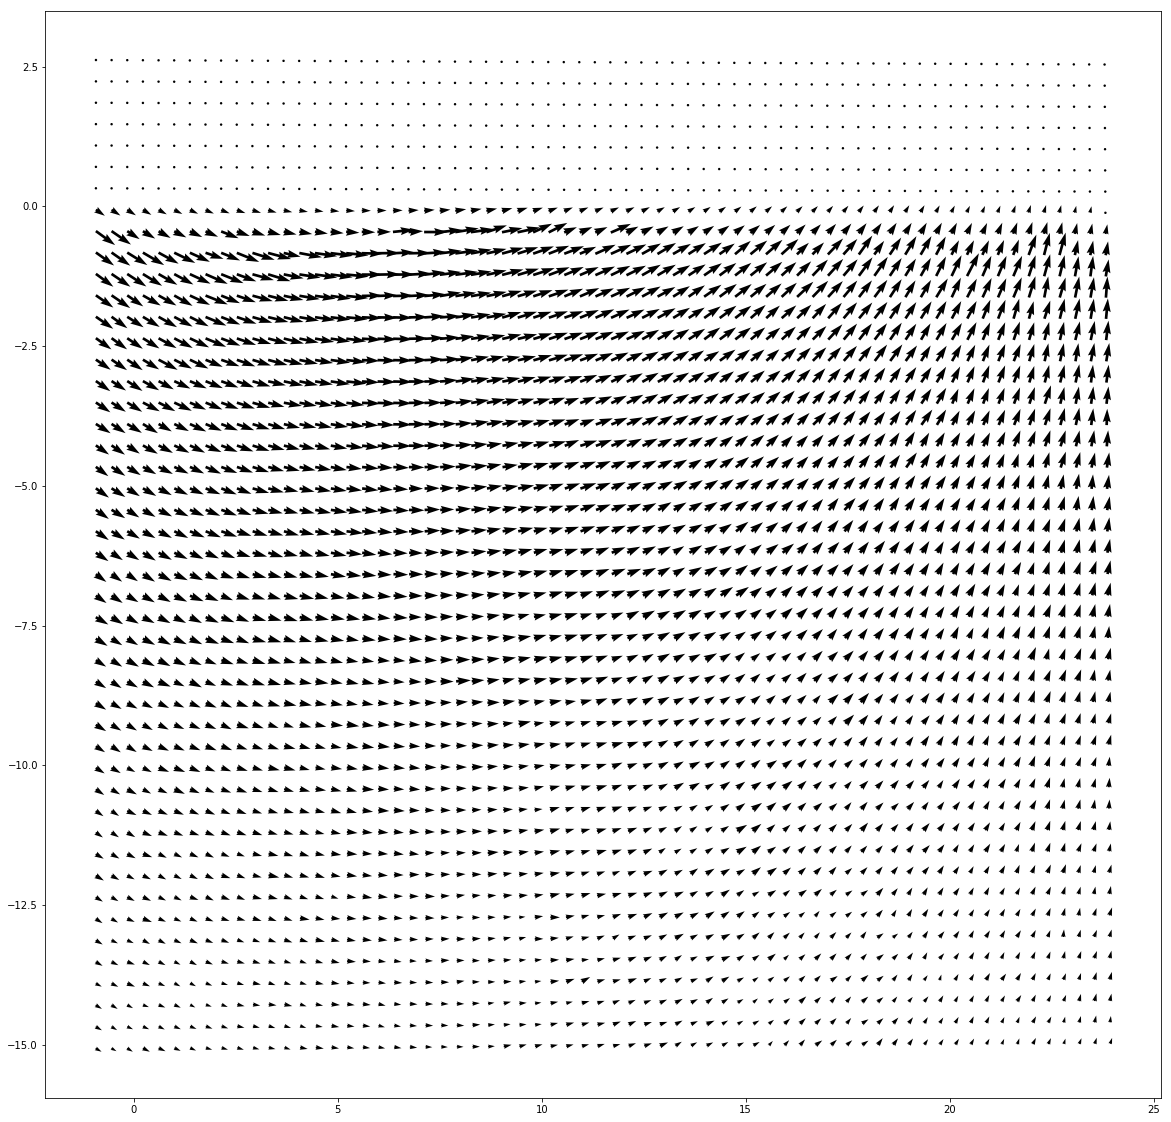

In [22]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( xw, yw, uw, vw)

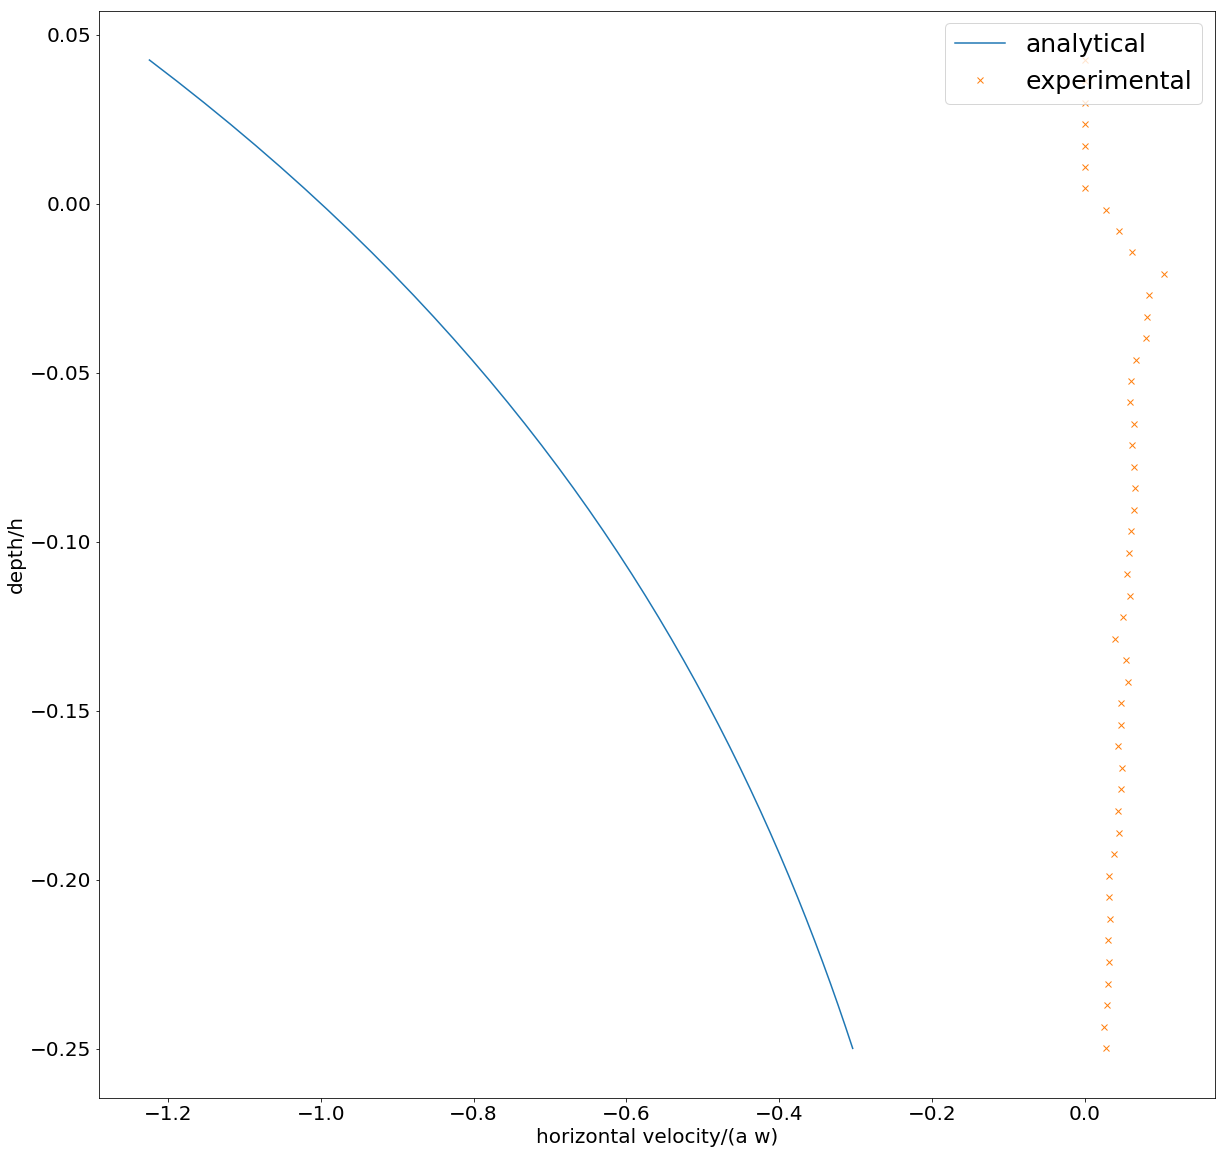

In [27]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
UUw = uw.reshape(u.shape[0],u.shape[1])  #reshaped in u shape
VVw = vw.reshape(v.shape[0],v.shape[1]) 
XXw = xw.reshape(x.shape[0],x.shape[1])
YYw = yw.reshape(y.shape[0],y.shape[1])
abc = numpy.argmax(numpy.sqrt(UUw**2)) # index of crest point
abc = numpy.argmax(numpy.sqrt(UUw**2 + VVw**2)) # index of crest point

#print(abc)
Uw_Crest = uw[abc] #horizontal velocity at crest
#print(uw[464],Uw_Crest)
#print("Values equal Uw_Crest = ", UUw[UUw==Uw_Crest])
indices = numpy.nonzero(UUw == Uw_Crest)  #indices in 2D coordinates
#print("Their indices are ", numpy.nonzero(UUw == Uw_Crest), UUw[numpy.nonzero(UUw == Uw_Crest)], 
#    VVw[numpy.nonzero(UUw == Uw_Crest)], XXw[numpy.nonzero(UUw == Uw_Crest)], YYw[numpy.nonzero(UUw == Uw_Crest)])
#print(indices[0], indices[1])
a = 2.05
w = 2*numpy.pi* 1.425  #8.95
k = 0.0795
h = 0.6*100 # cm
#print(YYw[:, indices[1]])
vs = -a*w*numpy.exp(k*YYw[:, indices[1]])  ##vx = -a*w*exp(k*yw(:,25));
#print(vs)
vw_s = vs/(a*w)    #scaling analytical value 
#plot(vx_s, yw(:,25)/h,  Uw(:,25)/(a*w),yw(:,25)/h,'x')
matplotlib.pyplot.plot( vw_s, YYw[:, indices[1]]/h, UUw[:, indices[1]]/(a*w), YYw[:, indices[1]]/h,'x')
matplotlib.pyplot.legend(['analytical', 'experimental'], fontsize= 25, loc= 1)
matplotlib.pyplot.ylabel('depth/h', fontsize= 20)#, rotation='horizontal')#(r'$\phi_1$', fontsize= 20, rotation='horizontal')
matplotlib.pyplot.xlabel('horizontal velocity/(a w)', fontsize= 20)#(r' $\theta  $ ', fontsize= 20)
matplotlib.pyplot.xticks(size=20)#(-1, 0, 1), ('-1', '0', '1'), color='k', size=20)
matplotlib.pyplot.yticks(size=20)

#matplotlib.pyplot.legend([r'$\frac{m_{11}}{\pi \rho b_0^2}$',r"$\frac{m_{22}}{\pi\rho a_0^2}$",
                         # r"$\frac{m_{66}}{8\pi\rho(a_0^2-b_0^2)^2}$"])
#matplotlib.pyplot.title('Ellipse $b_{0}/a_{0}$ = 0.5')

#fig.savefig('.pdf')
matplotlib.pyplot.show()